In [2]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
import re

In [5]:
sys.path.append('../scripts')

In [6]:
from load_data import load_data

In [41]:
df = load_data('../datasets/global_riverine_plastic_emissions_into_ocean.csv')

In [43]:
df.head()

,Country or Administrative area,Area [km2],Coast length [km],Rainfall [mm year -1],Factor L/A [-],Factor (L/A) *P [-],P[E] [%],MPW (metric tons year -1),M[E] (metric tons year -1),Ratio Me/MPW,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,Albania,28'486,362,1'117,0.0100,14.0,1.56%,69'833,1'565,2.24%,NaN,NaN,NaN,NaN
1,Algeria,2'316'559,998,80,0.0004,0.0,0.09%,764'578,5'774,0.76%,NaN,NaN,NaN,NaN
2,Angola,1'247'357,1'600,1'025,0.0010,1.0,0.09%,236'946,860,0.36%,NaN,NaN,NaN,NaN
3,Antigua and Barbuda,443,153,996,0.3000,344.0,3.08%,627,2,0.29%,NaN,NaN,NaN,NaN
4,Argentina,2'779'705,4'989,567,0.0020,1.0,0.26%,465'808,4'137,0.89%,NaN,NaN,NaN,NaN


In [44]:
# Remove Unnamed columns
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [45]:
df.head()

,Country or Administrative area,Area [km2],Coast length [km],Rainfall [mm year -1],Factor L/A [-],Factor (L/A) *P [-],P[E] [%],MPW (metric tons year -1),M[E] (metric tons year -1),Ratio Me/MPW
0,Albania,28'486,362,1'117,0.0100,14.0,1.56%,69'833,1'565,2.24%
1,Algeria,2'316'559,998,80,0.0004,0.0,0.09%,764'578,5'774,0.76%
2,Angola,1'247'357,1'600,1'025,0.0010,1.0,0.09%,236'946,860,0.36%
3,Antigua and Barbuda,443,153,996,0.3000,344.0,3.08%,627,2,0.29%
4,Argentina,2'779'705,4'989,567,0.0020,1.0,0.26%,465'808,4'137,0.89%


In [46]:
df.describe()

,Factor L/A [-],Factor (L/A) *P [-]
count,163.000000,163.000000
mean,0.168088,250.717791
std,0.513505,949.635716
min,0.000010,0.000000
25%,0.002000,2.000000
50%,0.009000,9.000000
75%,0.070000,93.500000
max,4.000000,9129.000000


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country or Administrative area  163 non-null    object 
 1   Area [km2]                      163 non-null    object 
 2   Coast length [km]               163 non-null    object 
 3   Rainfall [mm year -1]           163 non-null    object 
 4   Factor L/A [-]                  163 non-null    float64
 5   Factor (L/A) *P [-]             163 non-null    float64
 6   P[E] [%]                        163 non-null    object 
 7   MPW (metric tons year -1)       163 non-null    object 
 8   M[E] (metric tons year -1)      163 non-null    object 
 9   Ratio Me/MPW                    163 non-null    object 
dtypes: float64(2), object(8)
memory usage: 13.0+ KB


In [48]:
df.dtypes

Country or Administrative area     object
Area [km2]                         object
Coast length [km]                  object
Rainfall [mm year -1]              object
Factor L/A [-]                    float64
Factor (L/A) *P [-]               float64
P[E] [%]                           object
MPW (metric tons year -1)          object
M[E] (metric tons year -1)         object
Ratio Me/MPW                       object
dtype: object

In [49]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].str.replace("'", "", regex=True)
        df[col] = df[col].str.replace(",", "", regex=True)
        df[col] = df[col].str.replace("%", "", regex=True)
        df[col] = df[col].str.strip()

In [50]:
df

,Country or Administrative area,Area [km2],Coast length [km],Rainfall [mm year -1],Factor L/A [-],Factor (L/A) *P [-],P[E] [%],MPW (metric tons year -1),M[E] (metric tons year -1),Ratio Me/MPW
0,Albania,28486,362,1117,0.0100,14.0,1.56,69833,1565,2.24
1,Algeria,2316559,998,80,0.0004,0.0,0.09,764578,5774,0.76
2,Angola,1247357,1600,1025,0.0010,1.0,0.09,236946,860,0.36
3,Antigua and Barbuda,443,153,996,0.3000,344.0,3.08,627,2,0.29
4,Argentina,2779705,4989,567,0.0020,1.0,0.26,465808,4137,0.89
...,...,...,...,...,...,...,...,...,...,...
160,Venezuela,912557,2800,1875,0.0030,6.0,0.39,671431,5988,0.89
161,Vietnam,327732,3444,1772,0.0100,19.0,1.60,1112790,28221,2.54
162,Western Sahara,266830,111,35,0.0004,0.0,0.11,4114,38,0.91
163,Yemen,419900,1906,112,0.0050,1.0,0.07,291737,252,0.09


In [51]:
def plastic_contribution(met):
    if met not in df.columns:
        raise ValueError(f"'{met}' is not a valid metric. Available metrics: {', '.join(df.columns)}")
    if df[met] > 6008:
         return 0
    else:
        return 1

In [ ]:
# df['plastic_contribution'] = df['M[E] (metric tons year -1)'].apply(plastic_contribution)

In [53]:
df['M[E] (metric tons year -1)'] = df['M[E] (metric tons year -1)'].astype(float)

In [61]:
df['plastic_contribution'] = df['M[E] (metric tons year -1)'].apply(lambda x: 0 if x > 6008 else 1)

In [69]:
df

,Country or Administrative area,Area [km2],Coast length [km],Rainfall [mm year -1],Factor L/A [-],Factor (L/A) *P [-],P[E] [%],MPW (metric tons year -1),M[E] (metric tons year -1),Ratio Me/MPW,plastic_contribution
0,Albania,28486.0,362.0,1117.0,0.0100,14.0,1.56,69833.0,1565.0,2.24,1
1,Algeria,2316559.0,998.0,80.0,0.0004,0.0,0.09,764578.0,5774.0,0.76,1
2,Angola,1247357.0,1600.0,1025.0,0.0010,1.0,0.09,236946.0,860.0,0.36,1
3,Antigua and Barbuda,443.0,153.0,996.0,0.3000,344.0,3.08,627.0,2.0,0.29,1
4,Argentina,2779705.0,4989.0,567.0,0.0020,1.0,0.26,465808.0,4137.0,0.89,1
...,...,...,...,...,...,...,...,...,...,...,...
160,Venezuela,912557.0,2800.0,1875.0,0.0030,6.0,0.39,671431.0,5988.0,0.89,1
161,Vietnam,327732.0,3444.0,1772.0,0.0100,19.0,1.60,1112790.0,28221.0,2.54,0
162,Western Sahara,266830.0,111.0,35.0,0.0004,0.0,0.11,4114.0,38.0,0.91,1
163,Yemen,419900.0,1906.0,112.0,0.0050,1.0,0.07,291737.0,252.0,0.09,1


In [57]:
df.columns

Index(['Country or Administrative area', 'Area [km2]', 'Coast length [km]',
       'Rainfall [mm year -1]', 'Factor L/A [-]', 'Factor (L/A) *P [-]',
       'P[E] [%]', 'MPW (metric tons year -1)', 'M[E] (metric tons year -1)',
       'Ratio Me/MPW', 'plastic_contribution'],
      dtype='object')

In [64]:
for col in ['Area [km2]', 'Coast length [km]',
       'Rainfall [mm year -1]', 'Factor L/A [-]', 'Factor (L/A) *P [-]',
       'P[E] [%]', 'MPW (metric tons year -1)', 'M[E] (metric tons year -1)',
       'Ratio Me/MPW']:
    df[col] = df[col].astype(float)

In [65]:
df['plastic_contribution'].value_counts()

plastic_contribution
1    149
0     16
Name: count, dtype: int64

In [66]:
df.describe()

,Area [km2],Coast length [km],Rainfall [mm year -1],Factor L/A [-],Factor (L/A) *P [-],P[E] [%],MPW (metric tons year -1),M[E] (metric tons year -1),Ratio Me/MPW,plastic_contribution
count,1.630000e+02,163.000000,163.000000,163.000000,163.000000,163.000000,1.630000e+02,163.000000,163.000000,165.000000
mean,7.277222e+05,4315.852761,1235.957055,0.168088,250.717791,1.749141,3.789798e+05,6008.944785,2.370798,0.903030
std,2.054834e+06,17164.869315,834.378273,0.513505,949.635716,2.621274,1.469056e+06,30954.200425,3.364537,0.296817
min,8.000000e+00,4.000000,20.000000,0.000010,0.000000,0.000000,3.000000e+00,0.000000,0.000000,0.000000
25%,1.434650e+04,283.500000,597.500000,0.002000,2.000000,0.090000,1.716500e+03,8.000000,0.175000,1.000000
50%,1.113000e+05,648.000000,1090.000000,0.009000,9.000000,0.460000,2.169300e+04,235.000000,0.960000,1.000000
75%,4.557010e+05,2442.000000,1795.000000,0.070000,93.500000,2.550000,2.154820e+05,1515.000000,3.205000,1.000000
max,1.694540e+07,202080.000000,3821.000000,4.000000,9129.000000,13.740000,1.299410e+07,356371.000000,19.360000,1.000000


In [70]:
df

,Country or Administrative area,Area [km2],Coast length [km],Rainfall [mm year -1],Factor L/A [-],Factor (L/A) *P [-],P[E] [%],MPW (metric tons year -1),M[E] (metric tons year -1),Ratio Me/MPW,plastic_contribution
0,Albania,28486.0,362.0,1117.0,0.0100,14.0,1.56,69833.0,1565.0,2.24,1
1,Algeria,2316559.0,998.0,80.0,0.0004,0.0,0.09,764578.0,5774.0,0.76,1
2,Angola,1247357.0,1600.0,1025.0,0.0010,1.0,0.09,236946.0,860.0,0.36,1
3,Antigua and Barbuda,443.0,153.0,996.0,0.3000,344.0,3.08,627.0,2.0,0.29,1
4,Argentina,2779705.0,4989.0,567.0,0.0020,1.0,0.26,465808.0,4137.0,0.89,1
...,...,...,...,...,...,...,...,...,...,...,...
160,Venezuela,912557.0,2800.0,1875.0,0.0030,6.0,0.39,671431.0,5988.0,0.89,1
161,Vietnam,327732.0,3444.0,1772.0,0.0100,19.0,1.60,1112790.0,28221.0,2.54,0
162,Western Sahara,266830.0,111.0,35.0,0.0004,0.0,0.11,4114.0,38.0,0.91,1
163,Yemen,419900.0,1906.0,112.0,0.0050,1.0,0.07,291737.0,252.0,0.09,1


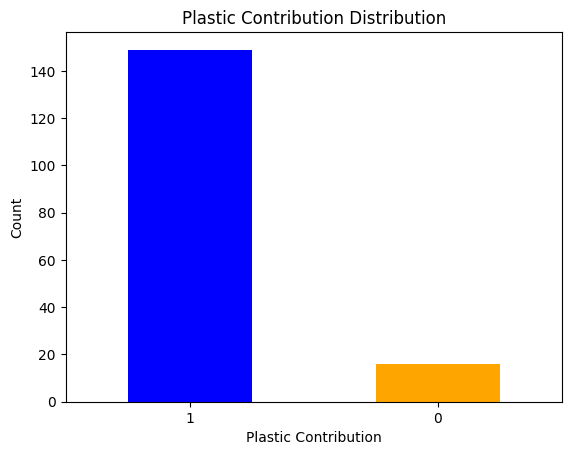

In [71]:
df['plastic_contribution'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Plastic Contribution Distribution')
plt.xlabel('Plastic Contribution')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

<Figure size 1000x600 with 0 Axes>

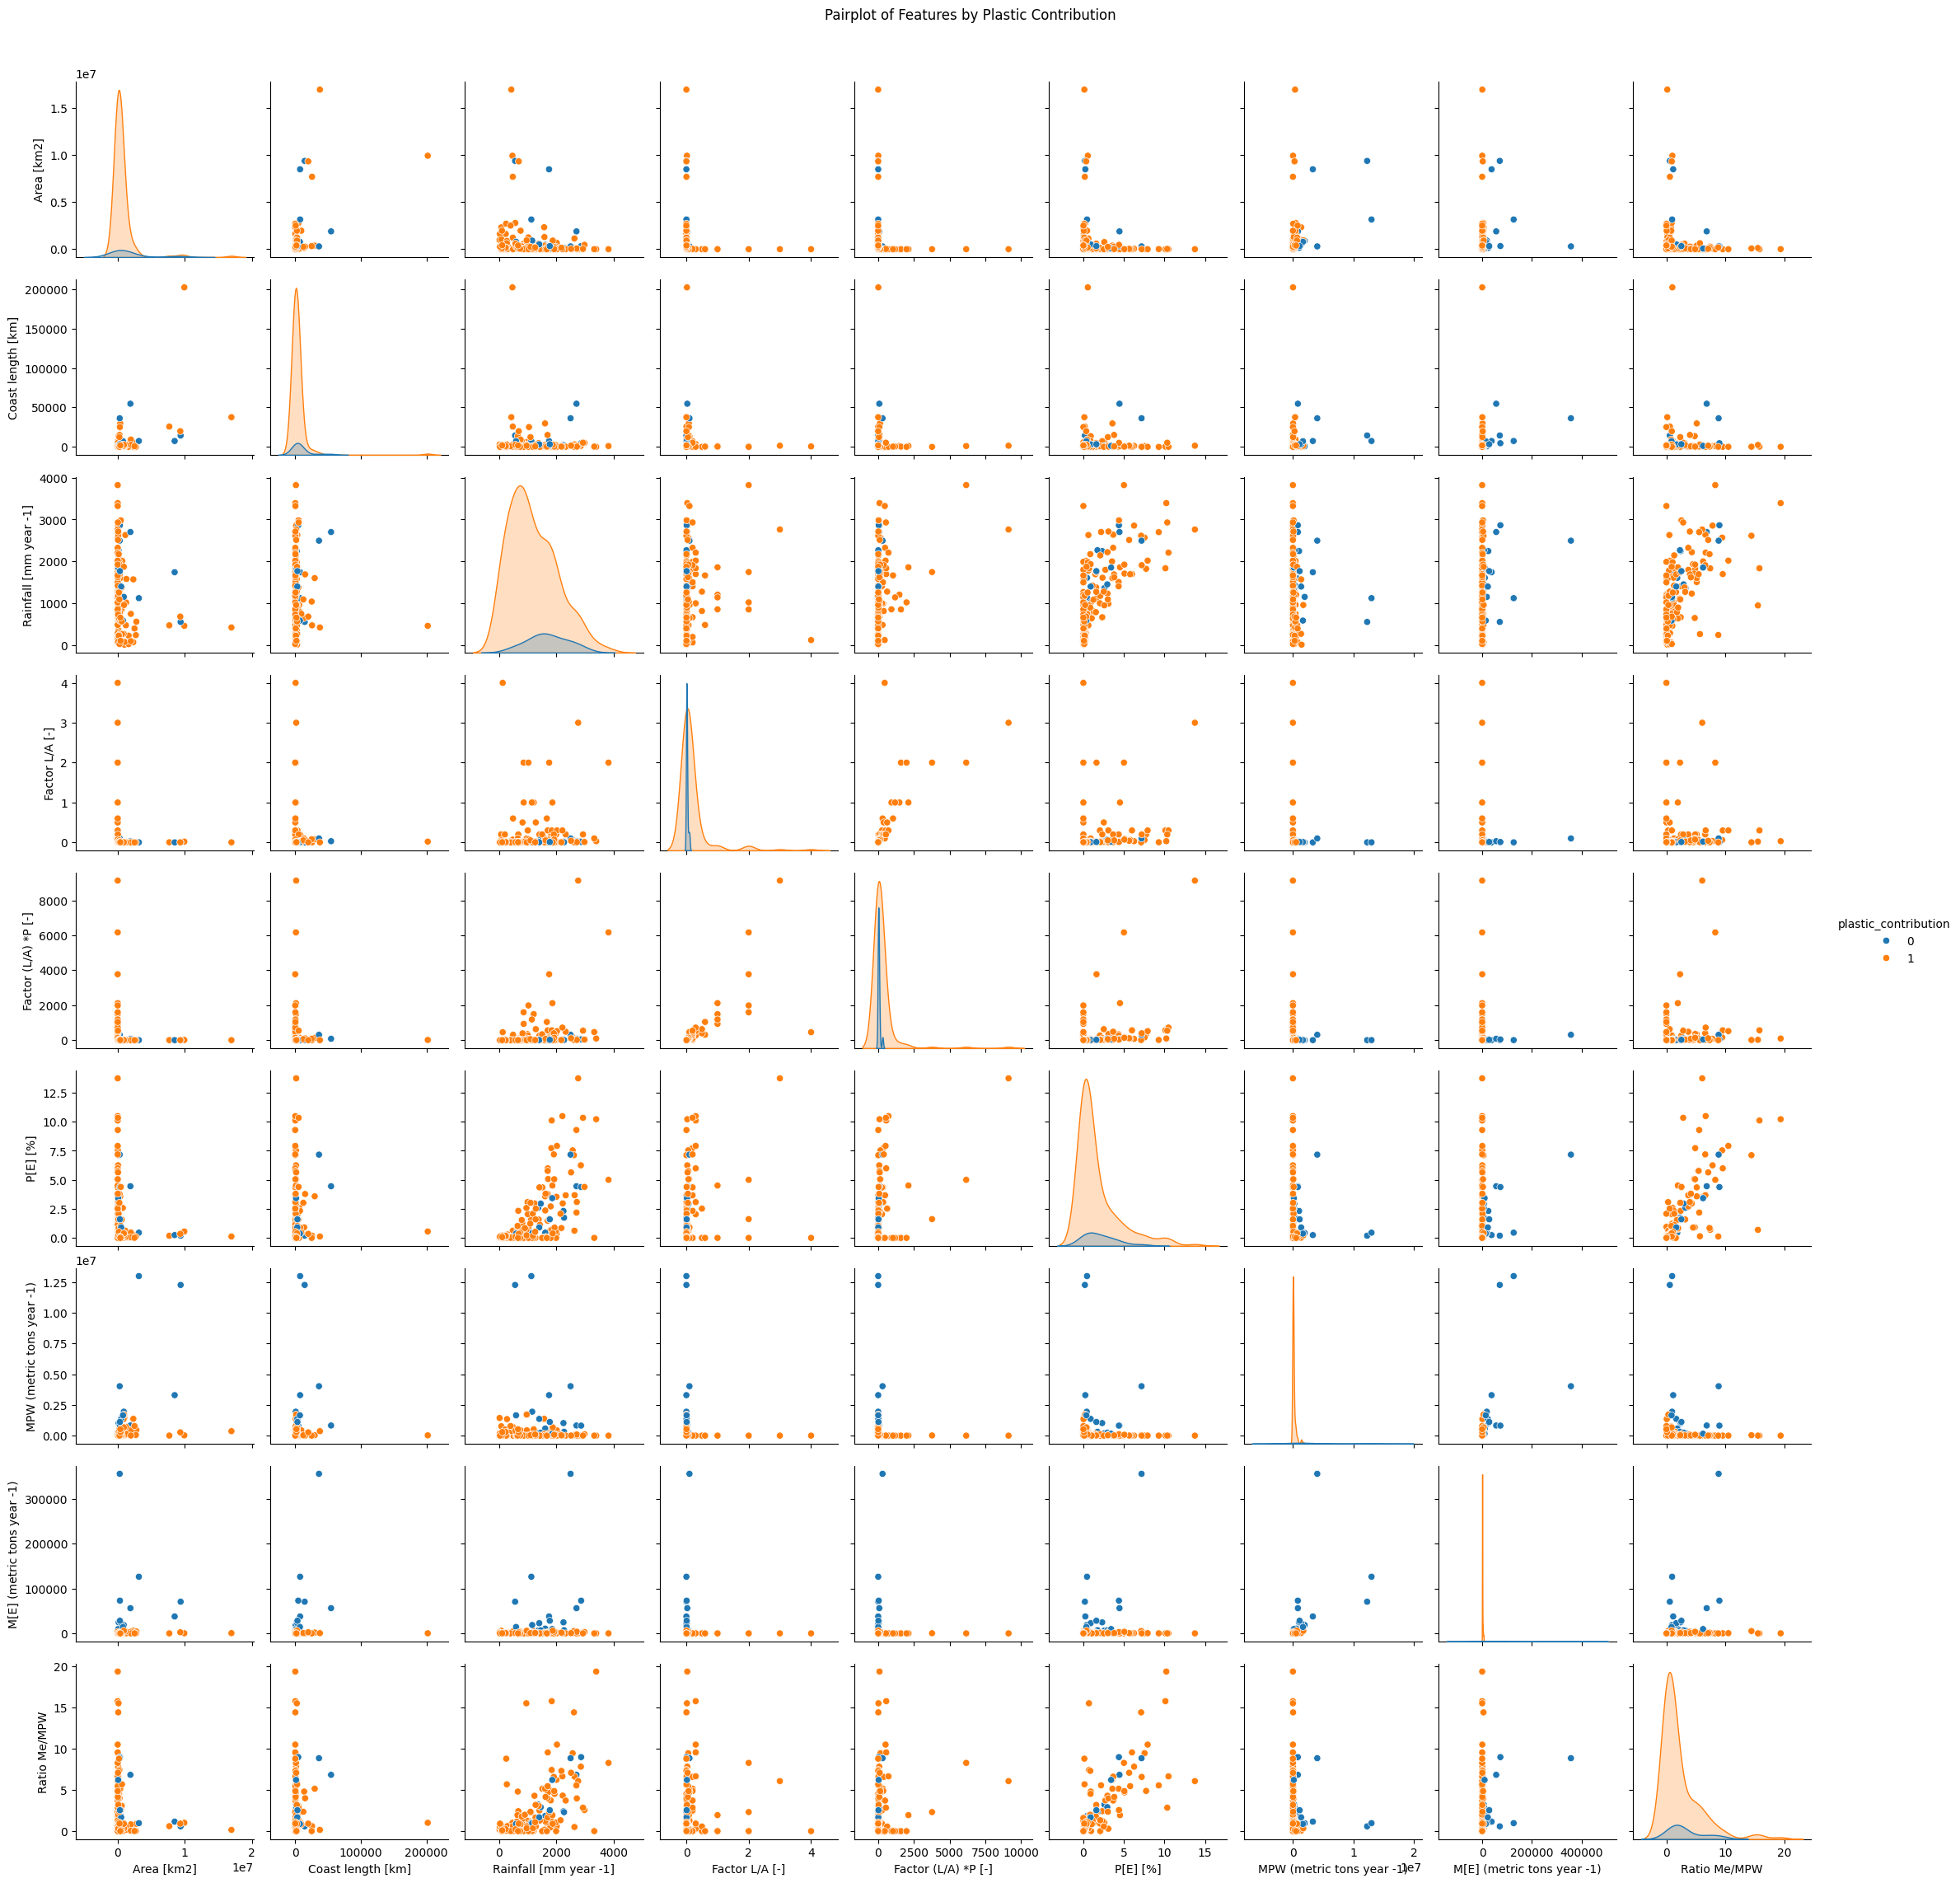

In [73]:
plt.figure(figsize=(10, 6))
sns.pairplot(df, hue='plastic_contribution', vars=['Area [km2]', 'Coast length [km]',
       'Rainfall [mm year -1]', 'Factor L/A [-]', 'Factor (L/A) *P [-]',
       'P[E] [%]', 'MPW (metric tons year -1)', 'M[E] (metric tons year -1)',
       'Ratio Me/MPW'])
plt.suptitle('Pairplot of Features by Plastic Contribution', y=1.02)
plt.show()

In [79]:
df.columns

Index(['Country or Administrative area', 'Area [km2]', 'Coast length [km]',
       'Rainfall [mm year -1]', 'Factor L/A [-]', 'Factor (L/A) *P [-]',
       'P[E] [%]', 'MPW (metric tons year -1)', 'M[E] (metric tons year -1)',
       'Ratio Me/MPW', 'plastic_contribution'],
      dtype='object')

In [80]:
df_copy = df.drop(columns=['Country or Administrative area'])

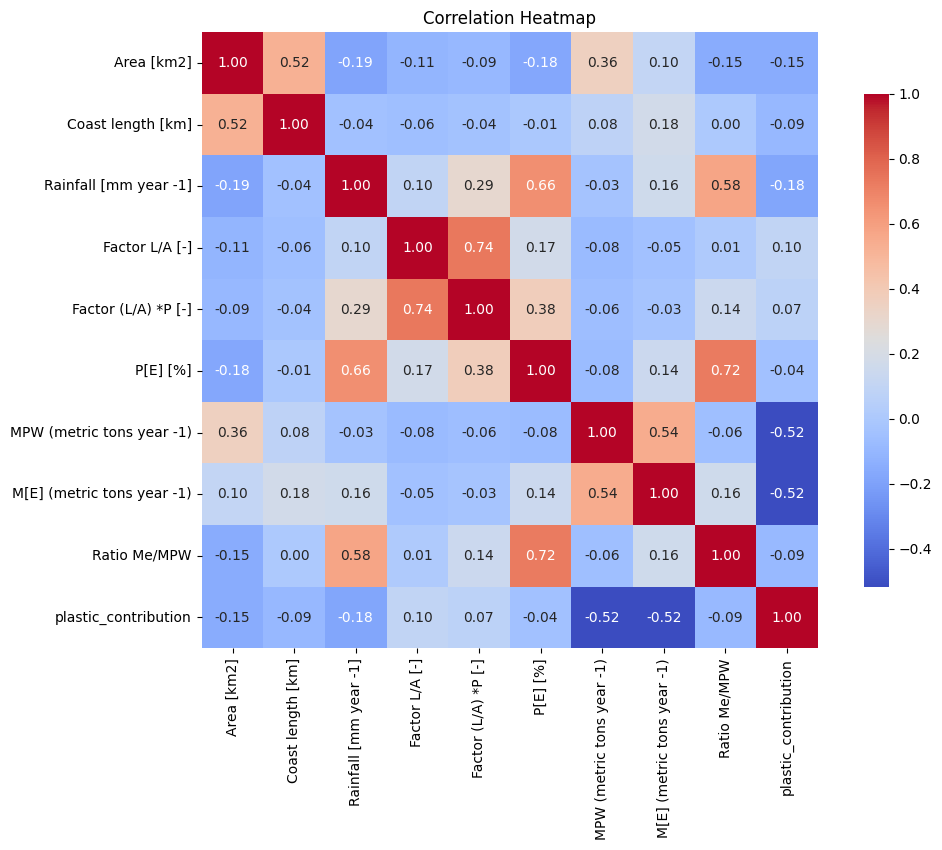

In [81]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_copy.corr(), annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap')
plt.show()